# **Notebook for Home Price Predictions** #


<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/ageron/handson-ml/blob/master/01_the_machine_learning_landscape.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

## **Setup**

In [ ]:
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)

drive.mount(ROOT)

/content/drive
Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/kaggle-home-prices/

/content/drive/MyDrive/kaggle-home-prices


In [ ]:
import numpy as np # linear algebra
import pandas as pd 

test = pd.DataFrame()
train = pd.DataFrame()
import os
for dirname, _, filenames in os.walk('data/'):
    for filename in filenames:
        if filename == "test.csv":
            test = pd.read_csv(os.path.join(dirname, filename))
        if filename == "train.csv":
            train = pd.read_csv(os.path.join(dirname, filename))    
        print(os.path.join(dirname, filename))

print(train.info)
print(test.info)

In [ ]:
print(train.head())
print(train.info())
print(train.describe())

   Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non

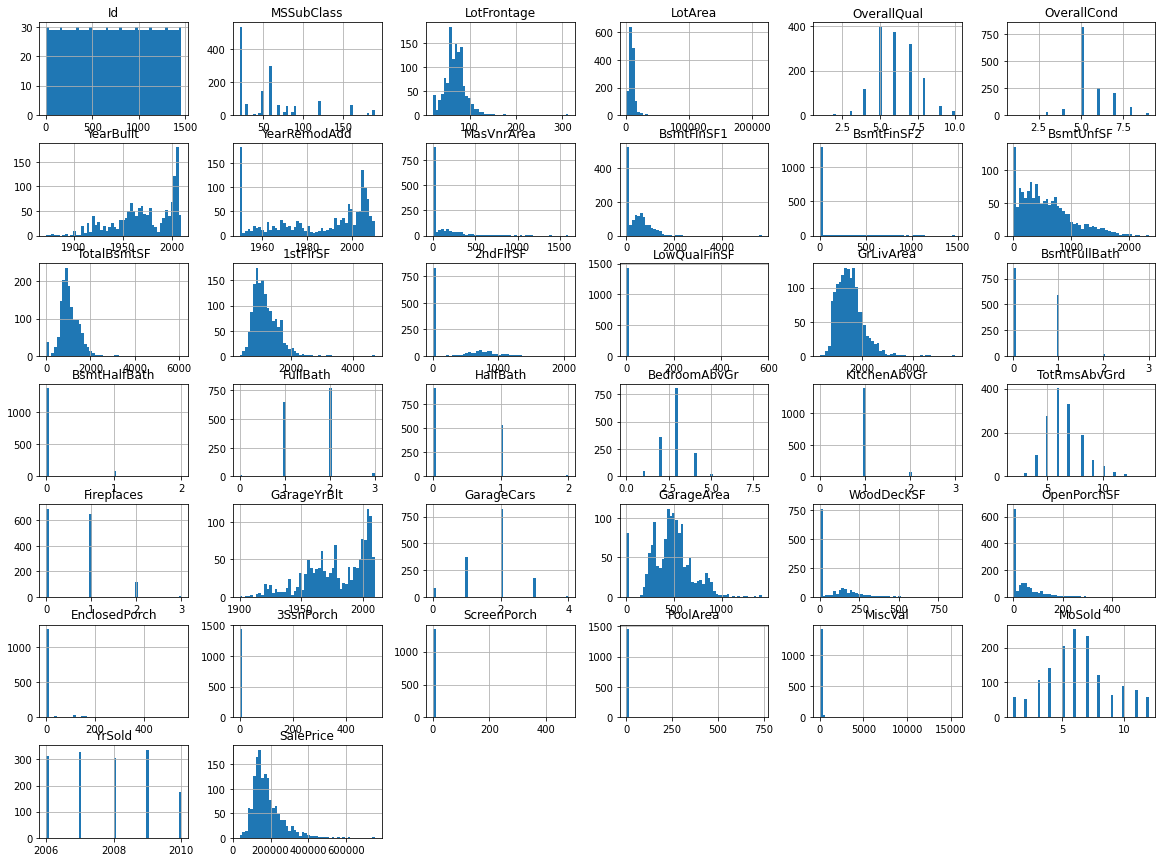

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
corr_matrix = train.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f223c427510>,
      dtype=object)

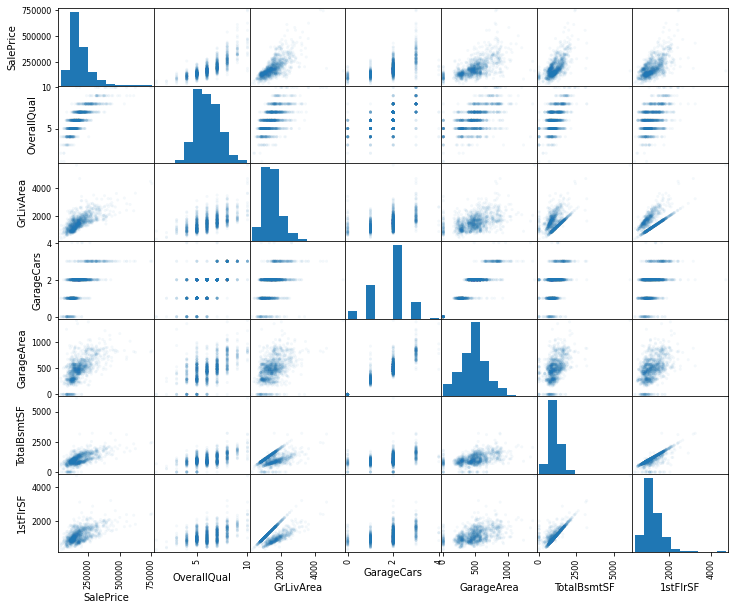

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF"]
scatter_matrix(train[attributes], figsize=(12,10),alpha=0.05)

[Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object'), Index(['TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'], dtype='object'), Index(['YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces',
       'BsmtFinSF1'],
      dtype='object'), Index(['LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath'], dtype='object'), Index(['LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch'], dtype='object'), Index(['PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath'], dtype='object'), Index(['MiscVal', 'Id', 'LowQualFinSF', 'YrSold', 'OverallCond'], dtype='object'), Index(['MSSubClass', 'EnclosedPorch', 'KitchenAbvGr'], dtype='object')]
Index(['TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'SalePrice'],
      dtype='object')
Index(['YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1',
       'SalePrice'],
      dtype='object')
Index(['LotFrontage', 'Woo

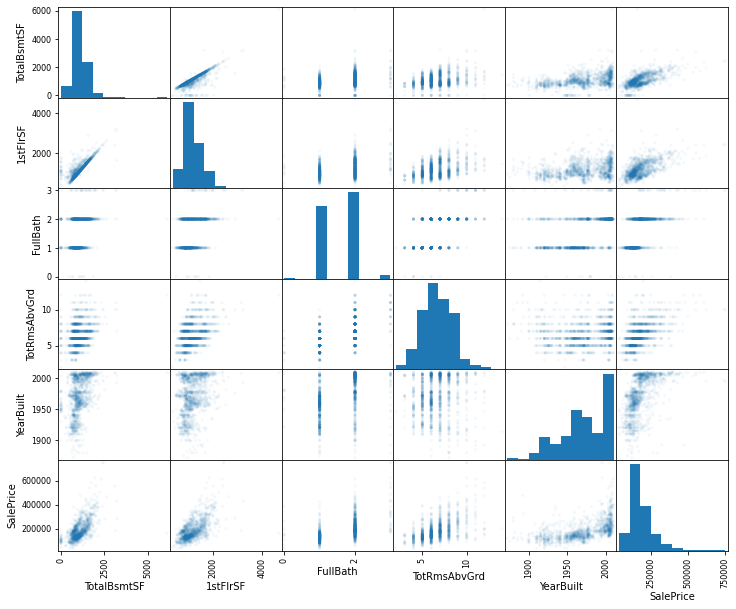

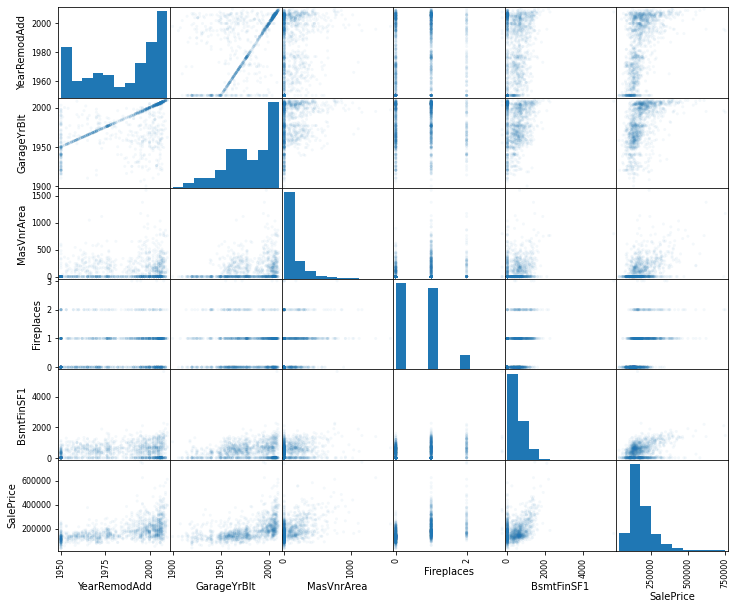

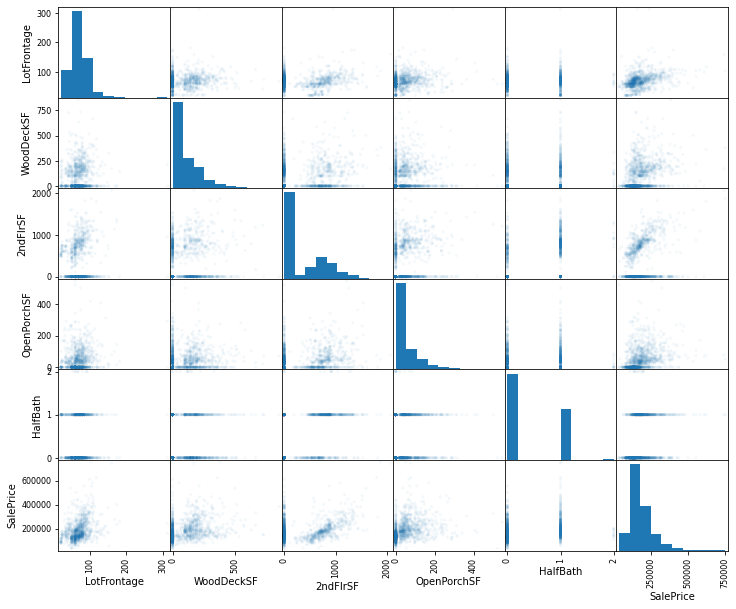

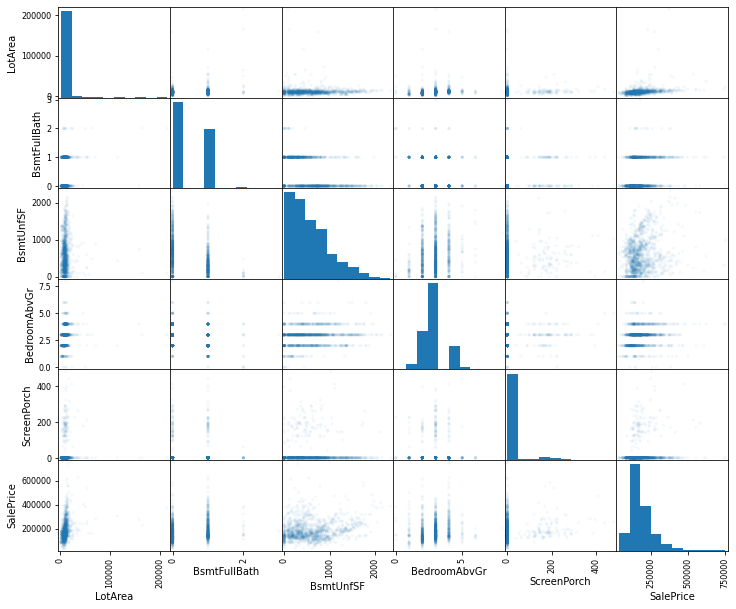

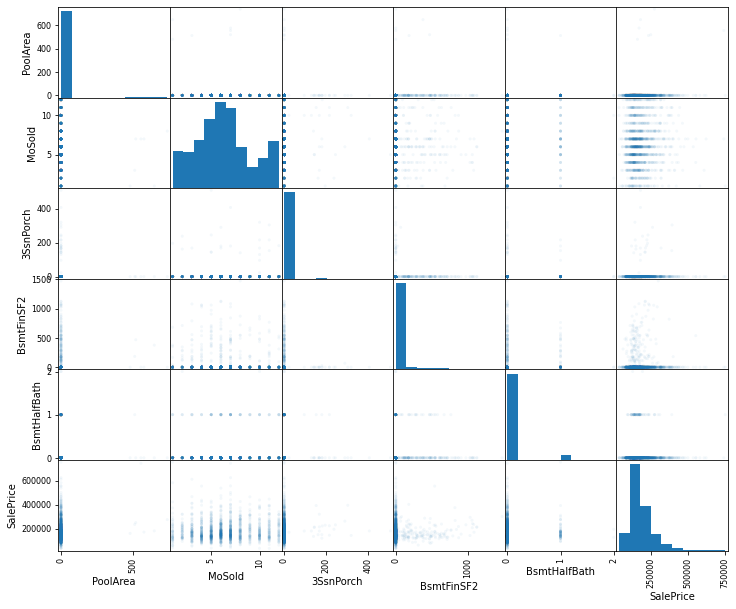

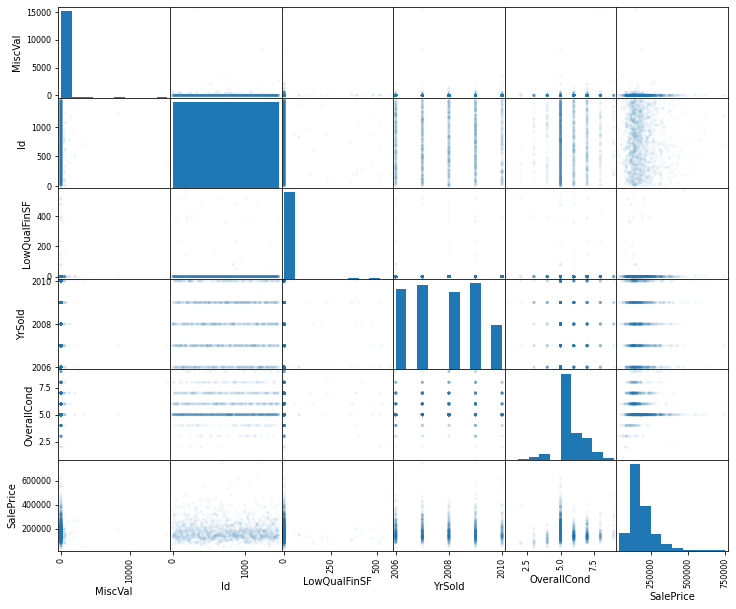

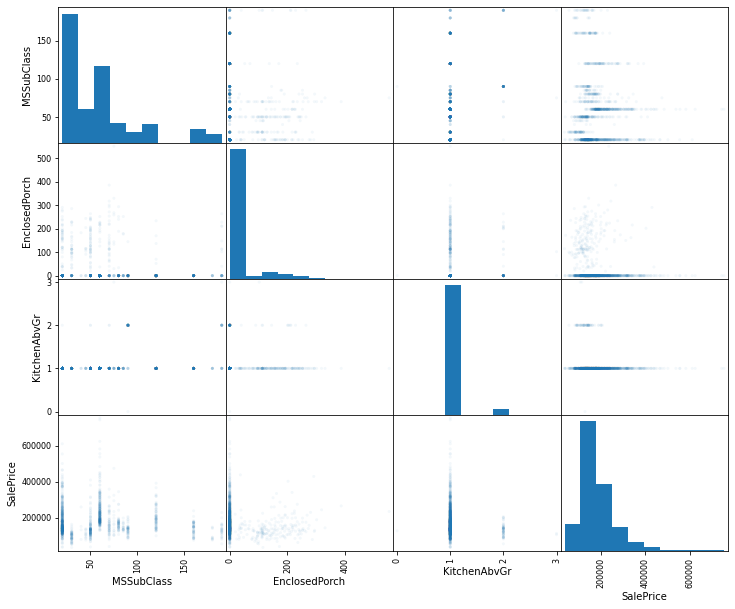

In [ ]:
keys = corr_matrix["SalePrice"].sort_values(ascending=False).keys()
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]
split_keys = list(chunks(keys, 5))
print(split_keys)
count = 0
for key_list in split_keys:
  if count == 0:
    count += 1
    continue  
  new_keys = key_list.append(pd.Index(["SalePrice"]))
  print(new_keys)
  scatter_matrix(train[new_keys], figsize=(12,10),alpha=0.05)
